<a href="https://colab.research.google.com/github/aesha15/bechdel-test/blob/main/Bechdel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install genderize

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast

import warnings
warnings.filterwarnings('ignore')

In [76]:
data = pd.read_csv('/content/data.csv')
data.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [77]:
data.isna().sum()

Unnamed: 0                0
Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

In [78]:
data.describe()

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03
mean,4999.50000,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07
std,2886.89568,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07
min,0.00000,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,2499.75000,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06
50%,4999.50000,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07
75%,7499.25000,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07
max,9999.00000,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


In [79]:
# handling missing values
data = data.dropna(subset=['Certification'])
data['MetaScore'].fillna(data['MetaScore'].mean(), inplace=True)
data['Gross'].fillna(data['Gross'].median(), inplace=True)
data.isna().sum()

Unnamed: 0             0
Movie Name             0
Year of Release        0
Run Time in minutes    0
Movie Rating           0
Votes                  0
MetaScore              0
Gross                  0
Genre                  0
Certification          0
Director               0
Stars                  0
Description            0
dtype: int64

In [80]:
data.describe()

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross
count,9631.000000,9631.000000,9631.000000,9631.000000,9.631000e+03,9631.000000,9.631000e+03
mean,5051.417298,2001.048697,110.372339,6.710082,9.561606e+04,59.118107,3.411546e+07
std,2871.802808,18.678590,21.833622,0.812836,1.742768e+05,15.660950,5.875118e+07
min,0.000000,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,2580.500000,1993.000000,96.000000,6.100000,1.737000e+04,49.000000,6.095000e+06
50%,5073.000000,2006.000000,106.000000,6.700000,3.590500e+04,59.118107,1.707000e+07
75%,7535.500000,2014.000000,120.000000,7.300000,9.540450e+04,69.000000,3.432500e+07
max,9998.000000,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9631 non-null   int64  
 1   Movie Name           9631 non-null   object 
 2   Year of Release      9631 non-null   int64  
 3   Run Time in minutes  9631 non-null   int64  
 4   Movie Rating         9631 non-null   float64
 5   Votes                9631 non-null   int64  
 6   MetaScore            9631 non-null   float64
 7   Gross                9631 non-null   float64
 8   Genre                9631 non-null   object 
 9   Certification        9631 non-null   object 
 10  Director             9631 non-null   object 
 11  Stars                9631 non-null   object 
 12  Description          9631 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.0+ MB


In [82]:
data['Genre'] = data['Genre'].apply(ast.literal_eval)
data['Director'] = data['Director'].apply(ast.literal_eval)
data['Stars'] = data['Stars'].apply(ast.literal_eval)

In [83]:
flattened_genre_df = data.explode('Genre').reset_index(drop=True)
flattened_dir_df = flattened_genre_df.explode('Director').reset_index(drop=True)
flattened_stars_df = flattened_dir_df.explode('Stars').reset_index(drop=True)
flattened_stars_df.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,Drama,R,Frank Darabont,Tim Robbins,"['Over', 'the', 'course', 'of', 'several', 'ye..."
1,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,Drama,R,Frank Darabont,Morgan Freeman,"['Over', 'the', 'course', 'of', 'several', 'ye..."
2,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,Drama,R,Frank Darabont,Bob Gunton,"['Over', 'the', 'course', 'of', 'several', 'ye..."
3,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,Drama,R,Frank Darabont,William Sadler,"['Over', 'the', 'course', 'of', 'several', 'ye..."
4,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,Crime,R,Francis Ford Coppola,Marlon Brando,"['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."


In [84]:
final_df = flattened_stars_df[['Movie Name', 'Year of Release', 'Movie Rating', 'Gross', 'Director', 'Stars']]
final_df.rename(columns={"Movie Name": "movie", "Year of Release": "release_year", "Movie Rating": "movie_rating", "Gross": "gross", "Director": "director", "Stars": "star"}, inplace=True)
final_df = final_df.drop_duplicates()
final_df.head()

,movie,release_year,movie_rating,gross,director,star
0,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Tim Robbins
1,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Morgan Freeman
2,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Bob Gunton
3,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,William Sadler
4,The Godfather,1972,9.2,134970000.0,Francis Ford Coppola,Marlon Brando


In [85]:
director_counts = final_df.groupby('director').size().reset_index(name='movie_count')
sorted_director_counts = director_counts.sort_values(by='movie_count', ascending=False)
sorted_director_counts.head(3)

,director,movie_count
4090,Woody Allen,192
731,Clint Eastwood,156
149,Alfred Hitchcock,148


In [86]:
actors = pd.read_csv('/content/all_actors_movies_gender_gold.csv')
actors = actors[['starring','gender']]
actors.rename(columns={"starring": "star", "gender": "star_gender"}, inplace=True)
actors.head()

,star,star_gender
0,Tom Cruise,male
1,Dougray Scott,male
2,Thandie Newton,female
3,Richard Roxburgh,male
4,John Polson,male


In [87]:
joined_actors = pd.merge(final_df, actors, on="star", how="inner")
joined_actors = joined_actors.drop_duplicates().reset_index(drop=True)
joined_actors.head()

,movie,release_year,movie_rating,gross,director,star,star_gender
0,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Tim Robbins,male
1,Mystic River,2003,7.9,90140000.0,Clint Eastwood,Tim Robbins,male
2,Short Cuts,1993,7.7,6110000.0,Robert Altman,Tim Robbins,male
3,Dark Waters,2019,7.6,17070000.0,Todd Haynes,Tim Robbins,male
4,The Player,1992,7.5,21710000.0,Robert Altman,Tim Robbins,male


In [88]:
joined_actors.isna().sum()

movie           0
release_year    0
movie_rating    0
gross           0
director        0
star            2
star_gender     0
dtype: int64

In [89]:
joined_actors = joined_actors.dropna()

In [90]:
directors = pd.read_csv('/content/all_directors_gender.csv')
directors = directors[['director','gender']]
directors.rename(columns={"gender": "director_gender"}, inplace=True)
directors.head()

,director,director_gender
0,John Woo,male
1,Ridley Scott,male
2,Robert Zemeckis,male
3,Nancy Meyers,female
4,Ralph Zondag,male


In [91]:
joined_directors = pd.merge(joined_actors, directors, on="director", how="inner")
joined_directors = joined_directors.drop_duplicates().reset_index(drop=True)
joined_directors.head()

,movie,release_year,movie_rating,gross,director,star,star_gender,director_gender
0,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Tim Robbins,male,male
1,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Morgan Freeman,male,male
2,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Bob Gunton,male,male
3,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,William Sadler,male,male
4,The Green Mile,1999,8.6,136800000.0,Frank Darabont,Tom Hanks,male,male


In [92]:
joined_directors.isna().sum()

movie              0
release_year       0
movie_rating       0
gross              0
director           0
star               0
star_gender        0
director_gender    0
dtype: int64

In [93]:
joined_directors[(joined_directors['director_gender'] =='unknown') | (joined_directors['star_gender'] =='unknown')].shape

(1724, 8)

In [94]:
df_cleaned = joined_directors[(joined_directors['director_gender'] !='unknown') & (joined_directors['star_gender'] !='unknown')]
df_cleaned.reset_index(drop=True)
df_cleaned

,movie,release_year,movie_rating,gross,director,star,star_gender,director_gender
0,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Tim Robbins,male,male
1,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Morgan Freeman,male,male
2,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,Bob Gunton,male,male
3,The Shawshank Redemption,1994,9.3,28340000.0,Frank Darabont,William Sadler,male,male
4,The Green Mile,1999,8.6,136800000.0,Frank Darabont,Tom Hanks,male,male
...,...,...,...,...,...,...,...,...
17162,Contracted,2013,5.3,0.0,Eric England,Najarra Townsend,female,male
17163,Contracted,2013,5.3,0.0,Eric England,Alice Macdonald,female,male
17164,Hell Fest,2018,5.5,11110000.0,Gregory Plotkin,Amy Forsyth,female,male
17166,Miss March,2009,5.0,4540000.0,Trevor Moore,Zach Cregger,male,male


In [95]:
sorted_df_cleaned = df_cleaned.sort_values(by=['release_year', 'movie']).reset_index(drop=True)
sorted_df_cleaned

,movie,release_year,movie_rating,gross,director,star,star_gender,director_gender
0,Fantasia,1940,7.7,76410000.0,James Algar,Corey Burton,male,male
1,The Manchurian Candidate,1962,7.9,17070000.0,John Frankenheimer,Angela Lansbury,female,male
2,Seven Days in May,1964,7.8,7960000.0,John Frankenheimer,Kirk Douglas,male,male
3,Repulsion,1965,7.6,17070000.0,Roman Polanski,Catherine Deneuve,female,male
4,Grand Prix,1966,7.2,20850000.0,John Frankenheimer,Eva Marie Saint,female,male
...,...,...,...,...,...,...,...,...
15439,The Pope's Exorcist,2023,6.1,17070000.0,Julius Avery,Daniel Zovatto,male,male
15440,The Super Mario Bros. Movie,2023,7.1,17070000.0,Aaron Horvath,Chris Pratt,male,male
15441,The Super Mario Bros. Movie,2023,7.1,17070000.0,Aaron Horvath,Jack Black,male,male
15442,The Super Mario Bros. Movie,2023,7.1,17070000.0,Aaron Horvath,Charlie Day,male,male


In [96]:
directed_by_women = sorted_df_cleaned[sorted_df_cleaned['director_gender'] =='female'].drop_duplicates(subset='movie')
directed_by_men = sorted_df_cleaned[sorted_df_cleaned['director_gender'] =='male'].drop_duplicates(subset='movie')

print("Total movies directed by Women: ", len(directed_by_women))
print("Total movies directed by Men: ", len(directed_by_men))

Total movies directed by Women:  263
Total movies directed by Men:  4422


In [97]:
# Group by director_gender and count the number of movies for each gender
movies_directed_per_gender = sorted_df_cleaned.groupby('director_gender')['movie'].nunique()
movies_directed_per_gender

director_gender
female     263
male      4422
Name: movie, dtype: int64

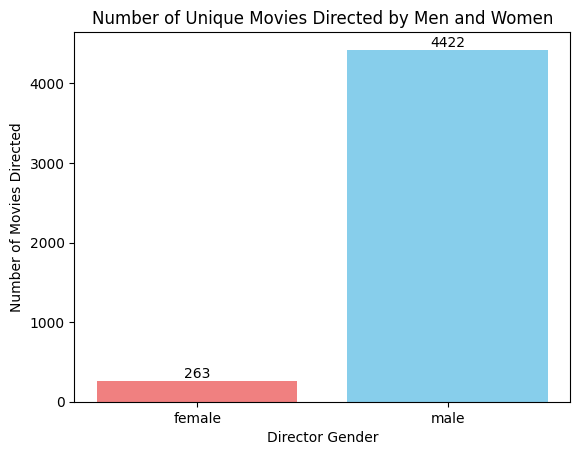

In [98]:
# Create a bar chart
fig, ax = plt.subplots()
ax.bar(movies_directed_per_gender.index, movies_directed_per_gender, color=['lightcoral', 'skyblue'])

# Add labels with the number of movies on the bars
for i, v in enumerate(movies_directed_per_gender):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Director Gender')
plt.ylabel('Number of Movies Directed')
plt.title('Number of Unique Movies Directed by Men and Women')
plt.xticks(rotation=0)
plt.show()

In [99]:
# Group by star_gender and count the number of movies for each gender
movies_acted_per_gender = sorted_df_cleaned.groupby('star_gender')['movie'].nunique()

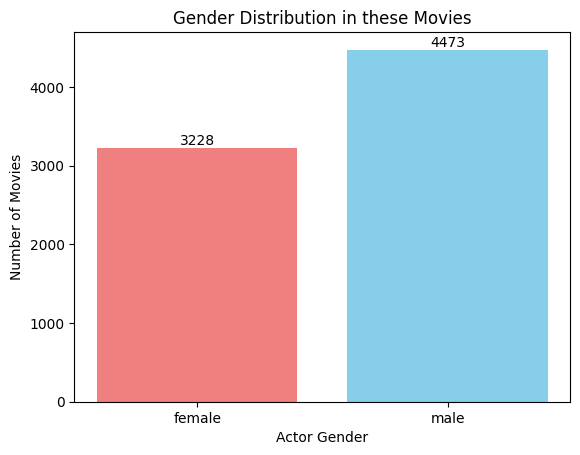

In [100]:
# Create a bar chart with labels
fig, ax = plt.subplots()
ax.bar(movies_acted_per_gender.index, movies_acted_per_gender, color=['lightcoral', 'skyblue'])

# Add labels with the number of movies on the bars
for i, v in enumerate(movies_acted_per_gender):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Actor Gender')
plt.ylabel('Number of Movies')
plt.title('Gender Distribution in these Movies')
plt.xticks(rotation=0)
plt.show()

In [101]:
# Filter movies with at least two female actresses
movies_with_two_female_actors = sorted_df_cleaned.groupby('movie').filter(lambda x: (x['star_gender'] == 'female').sum() >= 2).drop_duplicates(subset='movie')

# Get the number of movies
total_num_of_movies = len(sorted_df_cleaned['movie'].unique())
num_movies_with_two_female_actors = len(movies_with_two_female_actors['movie'].unique())
precentage_pass = (num_movies_with_two_female_actors/total_num_of_movies)*100
print("Total Movies: ", total_num_of_movies)
print("Movies with atlease two female actors: ", num_movies_with_two_female_actors)
print("% of movies that *might* pass the Bechdel test: ", precentage_pass)

Total Movies:  4655
Movies with atlease two female actors:  1172
% of movies that *might* pass the Bechdel test:  25.177228786251344


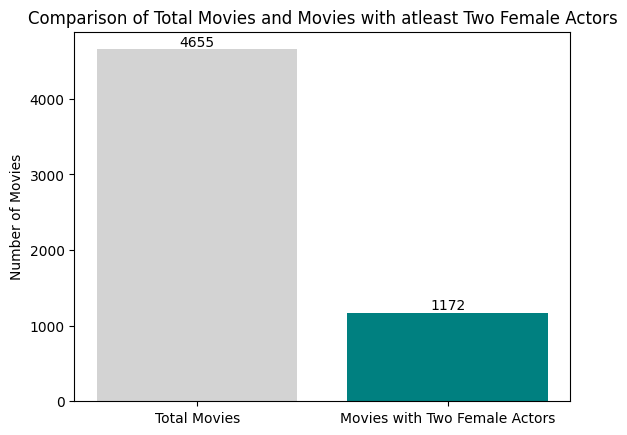

In [139]:
# Data for the bar chart
labels = ['Total Movies', 'Movies with Two Female Actors']
values = [total_num_of_movies, num_movies_with_two_female_actors]

# Create a bar chart
plt.bar(labels, values, color=['lightgray', 'teal'])

# Add labels and title
plt.title('Comparison of Total Movies and Movies with atleast Two Female Actors')
plt.ylabel('Number of Movies')

for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Display the chart
plt.show()

In [102]:
directed_by_women_and_passed = movies_with_two_female_actors[movies_with_two_female_actors['director_gender'] =='female'].drop_duplicates(subset='movie').reset_index(drop=True)
directed_by_women_and_passed

,movie,release_year,movie_rating,gross,director,star,star_gender,director_gender
0,Clueless,1995,6.9,56630000.0,Amy Heckerling,Paul Rudd,male,female
1,How to Make an American Quilt,1995,6.3,23570000.0,Jocelyn Moorhouse,Ellen Burstyn,female,female
2,Strange Days,1995,7.2,7920000.0,Kathryn Bigelow,Ralph Fiennes,male,female
3,Bound,1996,7.3,3800000.0,Lana Wachowski,Joe Pantoliano,male,female
4,Kama Sutra: A Tale of Love,1996,6.0,4110000.0,Mira Nair,Sarita Choudhury,female,female
...,...,...,...,...,...,...,...,...
100,Godmothered,2020,6.1,17070000.0,Sharon Maguire,June Squibb,female,female
101,Things Heard & Seen,2021,5.3,17070000.0,Shari Springer Berman,Amanda Seyfried,female,female
102,Hocus Pocus 2,2022,6.0,17070000.0,Anne Fletcher,Sarah Jessica Parker,female,female
103,Women Talking,2022,6.9,17070000.0,Sarah Polley,Frances McDormand,female,female


In [103]:
directed_by_men_and_passed = movies_with_two_female_actors[movies_with_two_female_actors['director_gender'] =='male'].drop_duplicates(subset='movie').reset_index(drop=True)
directed_by_men_and_passed

,movie,release_year,movie_rating,gross,director,star,star_gender,director_gender
0,The Manchurian Candidate,1962,7.9,17070000.0,John Frankenheimer,Angela Lansbury,female,male
1,Sisters,1972,6.9,350000.0,Brian De Palma,Charles Durning,male,male
2,Carrie,1976,7.4,33800000.0,Brian De Palma,John Travolta,male,male
3,Annie Hall,1977,8.0,39200000.0,Woody Allen,Diane Keaton,female,male
4,Interiors,1978,7.3,17070000.0,Woody Allen,Diane Keaton,female,male
...,...,...,...,...,...,...,...,...
1062,Beau Is Afraid,2023,6.8,17070000.0,Ari Aster,Joaquin Phoenix,male,male
1063,Dungeons & Dragons: Honor Among Thieves,2023,7.3,17070000.0,John Francis Daley,Chris Pine,male,male
1064,Fast X,2023,5.8,17070000.0,Louis Leterrier,Jason Statham,male,male
1065,Haunted Mansion,2023,6.2,17070000.0,Justin Simien,Owen Wilson,male,male


In [104]:
director_gender_for_passed = movies_with_two_female_actors.groupby('director_gender')['movie'].nunique()
director_gender_for_passed

director_gender
female     105
male      1067
Name: movie, dtype: int64

In [105]:
percentage_per_gender = ((director_gender_for_passed / movies_directed_per_gender) * 100).round(2)
percentage_per_gender

director_gender
female    39.92
male      24.13
Name: movie, dtype: float64

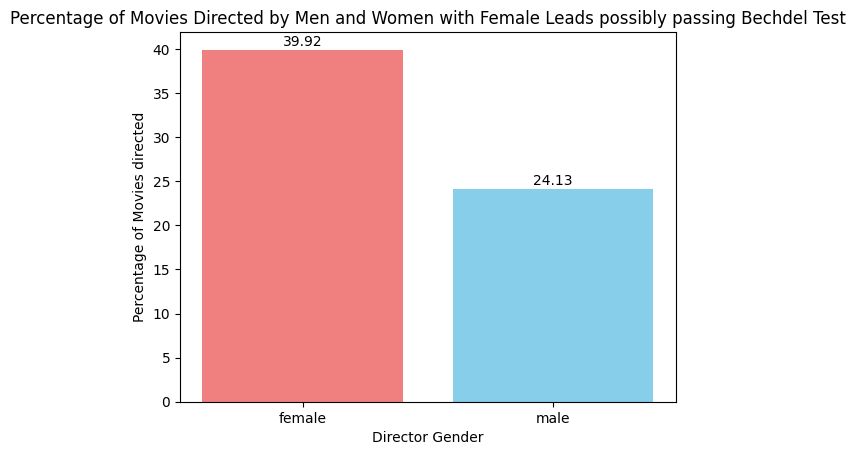

In [138]:
# Create a bar chart with labels
fig, ax = plt.subplots()
ax.bar(percentage_per_gender.index, percentage_per_gender, color=['lightcoral', 'skyblue'])

# Add labels with the number of movies on the bars
for i, v in enumerate(percentage_per_gender):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Director Gender')
plt.ylabel('Percentage of Movies directed')
plt.title('Percentage of Movies Directed by Men and Women with Female Leads possibly passing Bechdel Test')
plt.xticks(rotation=0)
plt.show()

In [107]:
sorted_by_popularity = movies_with_two_female_actors.sort_values(by='movie_rating', ascending=False).reset_index(drop=True)
sorted_by_popularity.head(20)

,movie,release_year,movie_rating,gross,director,star,star_gender,director_gender
0,Kill Bill: The Whole Bloody Affair,2006,8.8,17070000.0,Quentin Tarantino,Uma Thurman,female,male
1,Interstellar,2014,8.7,188020000.0,Christopher Nolan,Matthew McConaughey,male,male
2,Alien,1979,8.5,78900000.0,Ridley Scott,Sigourney Weaver,female,male
3,Django Unchained,2012,8.5,162810000.0,Quentin Tarantino,Leonardo DiCaprio,male,male
4,The Lion King,1994,8.5,422780000.0,Roger Allers,Matthew Broderick,male,male
5,Spider-Man: Into the Spider-Verse,2018,8.4,190240000.0,Bob Persichetti,Hailee Steinfeld,female,male
6,Joker,2019,8.4,335450000.0,Todd Phillips,Robert De Niro,male,male
7,Requiem for a Dream,2000,8.3,3640000.0,Darren Aronofsky,Jennifer Connelly,female,male
8,Scarface,1983,8.3,45600000.0,Brian De Palma,Al Pacino,male,male
9,Finding Nemo,2003,8.2,380840000.0,Lee Unkrich,Albert Brooks,male,male


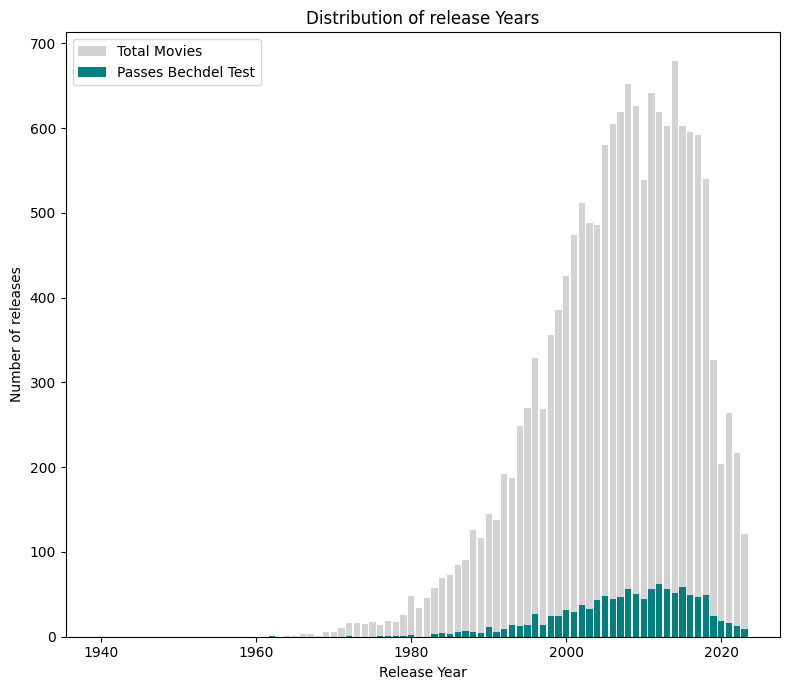

In [108]:
passed_movies_by_year = movies_with_two_female_actors.groupby('release_year')['movie'].count()
total_movies_per_year = sorted_df_cleaned.groupby('release_year')['movie'].count()


plt.figure(figsize=(8, 7))

plt.bar(total_movies_per_year.index, total_movies_per_year, color='lightgray', label='Total Movies')
plt.bar(passed_movies_by_year.index, passed_movies_by_year, color='teal', label='Passes Bechdel Test')

# sns.barplot(x = year_counts.index, y = year_counts.values)
plt.title('Distribution of release Years')
plt.xlabel('Release Year')
plt.xticks()
plt.ylabel('Number of releases')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
movies_failed = sorted_df_cleaned.groupby('movie').filter(lambda x: (x['star_gender'] == 'female').sum() < 2).drop_duplicates(subset='movie')
failed_sorted_by_popularity = movies_failed.sort_values(by='movie_rating', ascending=False).reset_index(drop=True)
failed_sorted_by_popularity.head(30)

In [ ]:
failed_sorted_by_popularity[failed_sorted_by_popularity['release_year'] == 2015].head(40)

In [110]:
# from genderize import Genderize
# import requests

# def get_gender(name):
#     try:
#         result = Genderize().get([name])[0]
#         return result['gender']
#     except:
#         print("N")
#         return None


In [111]:
# unknown_director_gender_rows = joined_directors[joined_directors['director_gender']=='unknown'].drop_duplicates(subset='director')

# chunk = unknown_director_gender_rows.iloc[0:30] # update the count everyday
# chunk['director_gender'] = chunk['director'].str.split().str[0].apply(get_gender)
# unknown_director_gender = unknown_director_gender_rows.append(chunk, ignore_index=True)

# unknown_director_gender.reset_index(drop=True)

# unknown_director_gender_rows['director_gender'] = unknown_director_gender_rows['director'].str.split().str[0].head(25).apply(get_gender)


In [112]:
# unknown_star_gender_rows = joined_directors[joined_directors['star_gender']=='unknown'].drop_duplicates(subset='star')
# unknown_star_gender_rows['star_gender'] = unknown_star_gender_rows['star'].str.split().str[0].head(25).apply(get_gender)
# unknown_star_gender_rows.reset_index(drop=True)